Выкачиваем датасет и сохраняем его в файле, если датасет скачан, можно пропустить этот шаг

In [31]:
import pandas as pd
df = pd.DataFrame([], columns=['name','gender', 'count', 'year'])
for year in range(1980, 2011):
    url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob{}.txt'.format(year)
    print(url)
    year_df = pd.read_csv(url, delimiter=',', names = ['name','gender', 'count'])
    year_df['year'] =  year
    df = df.append(year_df)
df.to_csv('usa_name_years.csv', encoding='utf-8')

https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1980.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1981.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1982.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1983.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1984.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1985.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1986.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1987.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1988.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1989.txt
https://raw.githubusercontent.com/wesm/pydata-book/2nd-editi

подгрузка датасета из файла

In [174]:
import pandas as pd
import numpy as np
df = pd.read_csv('usa_name_years.csv',index_col=0, dtype={'count': np.int32, 'year': np.int32})
df.head(10)

,name,gender,count,year
0,Jennifer,F,58375,1980
1,Amanda,F,35817,1980
2,Jessica,F,33914,1980
3,Melissa,F,31625,1980
4,Sarah,F,25737,1980
5,Heather,F,19965,1980
6,Nicole,F,19910,1980
7,Amy,F,19832,1980
8,Elizabeth,F,19523,1980
9,Michelle,F,19113,1980


Сгруппируйте данные по полу и году и визуализация рождаемости

In [26]:
df.groupby(['year','gender']).agg({'name': 'count', 'count': 'sum'}).head()

name    count
year gender                
1980 F       12152  1659259
     M        7272  1782388
1981 F       12178  1666833
     M        7274  1789568
1982 F       12316  1692036

In [75]:
#grp = df.groupby(['year','gender']).agg({'count': 'sum'})
year_gender = pd.pivot_table(df, index=['year'], columns=['gender'], values=['count'], aggfunc='sum')

In [6]:
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline

In [77]:
year_gender.head(10)

count         
gender        F        M
year                    
1980    1659259  1782388
1981    1666833  1789568
1982    1692036  1812642
1983    1669486  1790670
1984    1682396  1802735
1985    1719450  1846162
1986    1714053  1839442
1987    1737508  1865113
1988    1779112  1911858
1989    1843057  1999840

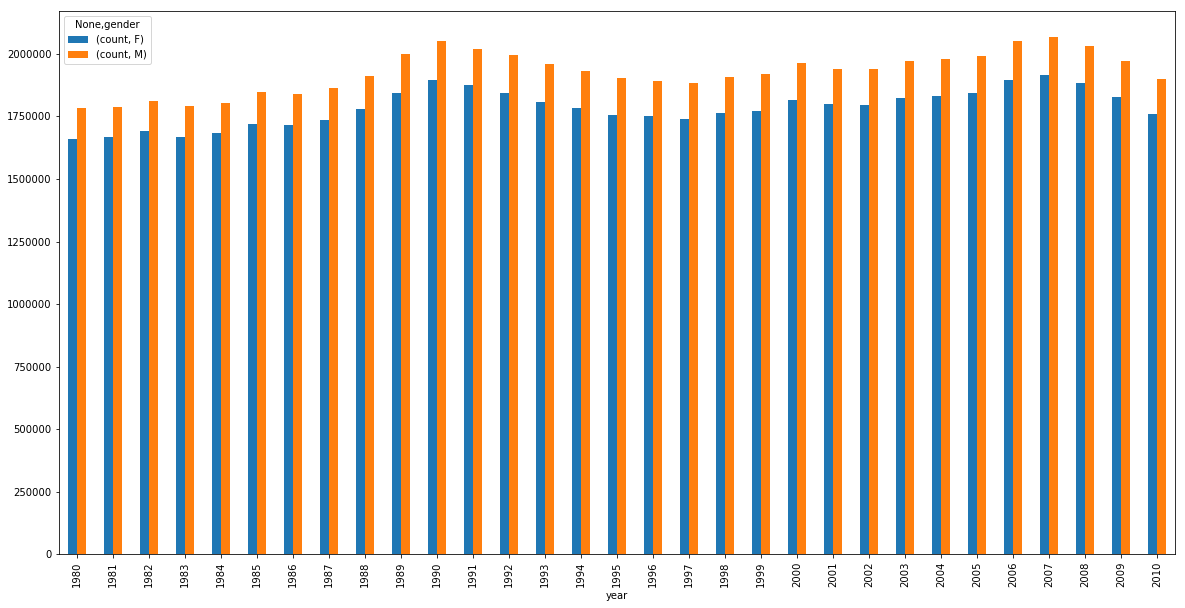

In [78]:
year_gender.plot.bar(figsize=(20,10), use_index=True, sharey=True, legend=True)

Самые популярные имена

In [31]:
df.groupby('name')['count'].agg({'count':'sum'}).sort_values('count', ascending=False).head(10)

,count
name,
Michael,1400614
Christopher,1136863
Matthew,1049049
Joshua,976137
Jessica,869007
Daniel,840313
David,833782
Ashley,800218
James,781217


сколько имен покрывают 50% людей за каждый код

In [26]:
#df.groupby(['year','name']).agg({'count':'sum'}).sort_values(by=[ 'count'] , ascending=[False])
#year_count = df.groupby('year')['count'].sum()
years = df.groupby(['year']).agg({'count':'sum'})
years.columns = ['total_count']
calc_df = years.join(df.set_index('year'))
calc_df['percent'] = calc_df['count']/(calc_df['total_count']/100)
sorted_df = calc_df.reset_index().sort_values(by=['year','percent'], ascending=[True, False])
sorted_df['total_percent'] = sorted_df['percent'].groupby(sorted_df['year']).transform(lambda x: x.expanding().sum())

In [27]:
limit_df = sorted_df[sorted_df['total_percent']>=50].groupby('year').agg({'total_percent':'min'})

In [28]:
limit_df.columns = ['limit_percent']

In [29]:
condition_df = limit_df.join(sorted_df.set_index('year'))
condition_df[condition_df['total_percent'] <= condition_df['limit_percent']].reset_index().groupby('year').agg({'name': 'count'})


,name
year,
1980,99
1981,97
1982,96
1983,91
1984,93
1985,95
1986,97
1987,100
1988,106


In [113]:
year_name = pd.pivot_table(df, index=['name'], columns=['year'], values=['count'], aggfunc='sum')
sorted_df['name_count'] = sorted_df['percent'].groupby(sorted_df['year']).transform(lambda x: x.expanding().count())
sorted_df.head()

,year,total_count,name,gender,count,percent,total_percent,name_count
12152,1980,3441647,Michael,M,68619,1.993784,1.993784,1.0
0,1980,3441647,Jennifer,F,58375,1.696136,3.689919,2.0
12153,1980,3441647,Christopher,M,49062,1.425538,5.115458,3.0
12154,1980,3441647,Jason,M,48164,1.399446,6.514904,4.0
12155,1980,3441647,David,M,41878,1.216801,7.731705,5.0


In [110]:
vis_df = pd.pivot_table(sorted_df.reset_index()[['year','name','percent']], 
                        index=['name'], 
                        columns=['year'], 
                        values=['percent'], 
                        dropna = True,
                        aggfunc='sum')

In [117]:
#sorted_df[['total_percent','name_count','year']].plot(y='name_count', x='total_percent')
pvt = pd.pivot_table(sorted_df, index=['name_count'], columns=['year'], values=['total_percent'])

In [93]:
vis_df=sorted_df.reset_index()[['name','year','total_percent']]

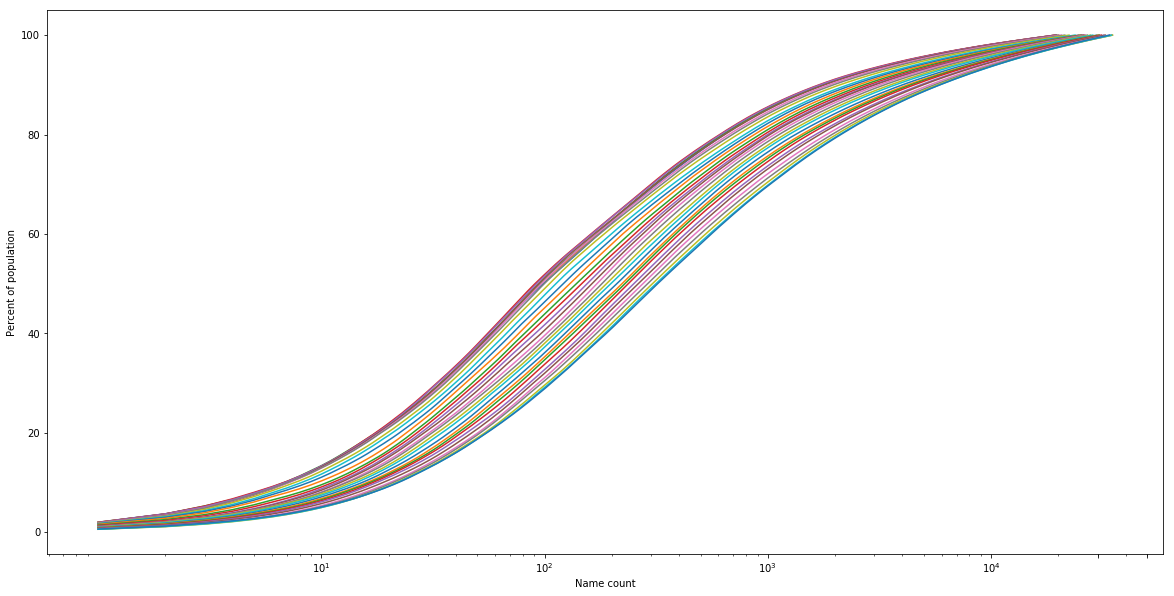

In [126]:
fig, ax= plt.subplots(1, 1, figsize=(20,10))
ax.set_xscale("log")
ax.set_xticks([0, 10, 100, 1000, 10000, 30000, 50000, 70000])
ax.set_ylabel('Percent of population')
ax.set_xlabel('Name count')

plt.plot(pvt)

Разбейте весь временной промежуток в данных на 10 частей и для каждой
найдите самое популярное имя каждого пола. Для каждого найденного имени
визуализируйте его динамику за все время

In [180]:
year_interval = df['year'].nunique() // 10
years = np.arange(df['year'].min(), df['year'].max(), year_interval )

def year_range(x):
    return years[np.where( years <= x)].max()

df_plain = df.reset_index()
df_plain['year_range'] = df_plain['year'].apply(lambda x: year_range(x))
    
df_agg = df.groupby('year_range').agg({'count': 'idxmax'} )
popular_names = df_plain.ix[df_agg['count']]
popular_names.head(10)           

,level_0,index,name,gender,count,year,year_range
31602,31602,12178,Michael,M,68713,1981,1980
70601,70601,12057,Michael,M,67949,1983,1983
130299,130299,12811,Michael,M,64164,1986,1986
196371,196371,14534,Michael,M,65384,1989,1989
271011,271011,15603,Michael,M,54364,1992,1992
348501,348501,15751,Michael,M,41396,1995,1995
428789,428789,16590,Michael,M,36604,1998,1998
516345,516345,17962,Jacob,M,32509,2001,2001
609154,609154,18811,Jacob,M,27854,2004,2004
709428,709428,20520,Jacob,M,24216,2007,2007


In [181]:
names = popular_names['name'].unique()
names

array(['Michael', 'Jacob'], dtype=object)

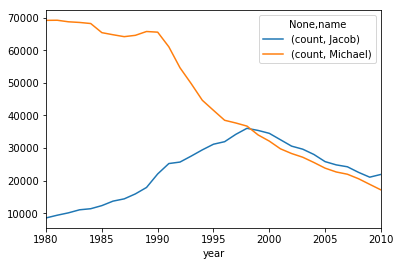

In [189]:
pop_name_pvt = pd.pivot_table(df[df['name'].isin(names)],  index=['year'], columns=['name'], values=['count'], aggfunc='sum')
pop_name_pvt.plot()

Влияние имен известных людей

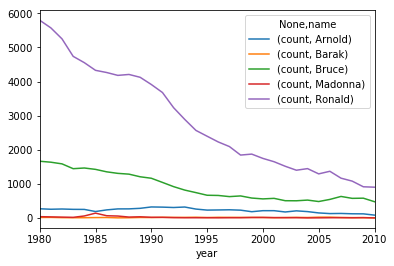

In [200]:
famous = np.array(['Arnold','Barak','Bruce','Madonna','Ronald'])
pop_name_pvt = pd.pivot_table(df[df['name'].isin(famous)],  index=['year'], columns=['name'], values=['count'], aggfunc='sum')
pop_name_pvt.plot()